# ML assignment

**Authors:**
 - Oleh Pomazan *oleh.pomazan@ue-germany.de*

 Original paper link: https://www.sciencedirect.com/science/article/pii/S2352484720313007#b13


In [1]:
import numpy as np
from features import read_features_from_csv

# features = read_features_from_csv()
train_frame, test_frame, x_train, x_test, y_train, y_test = read_features_from_csv()

In [2]:
train_frame

,Unnamed: 0,path,class,class_id,features
8450,8450,input/audio/fold1/193698-2-0-58.wav,children_playing,2,"[-319.29752, 102.58311, -49.749527, 7.117446, ..."
8585,8585,input/audio/fold1/118279-8-0-4.wav,siren,8,"[-279.48712, 112.4627, -27.210625, 27.530556, ..."
2404,2404,input/audio/fold7/83488-1-0-0.wav,car_horn,1,"[-176.89964, -65.4562, -2.5445695, 52.369923, ..."
4477,4477,input/audio/fold5/196062-2-0-0.wav,children_playing,2,"[-281.53714, 43.722984, -21.65799, 24.144136, ..."
6173,6173,input/audio/fold2/102871-8-0-13.wav,siren,8,"[-276.41293, 153.79091, -51.535614, -6.9765244..."
...,...,...,...,...,...
5734,5734,input/audio/fold6/63724-0-0-9.wav,air_conditioner,0,"[-353.99768, 120.82677, -25.244507, 34.66291, ..."
5191,5191,input/audio/fold5/178686-0-0-53.wav,air_conditioner,0,"[-377.1148, 169.02785, -28.958954, 31.370935, ..."
5390,5390,input/audio/fold6/39852-5-0-1.wav,engine_idling,5,"[-0.2182836, 156.47552, -29.636814, 39.782234,..."
860,860,input/audio/fold4/24347-8-0-51.wav,siren,8,"[-128.50357, 166.96239, -68.697365, -8.287582,..."


In [3]:
test_frame

,Unnamed: 0,path,class,class_id,features
6770,6770,input/audio/fold2/203128-3-6-0.wav,dog_bark,3,"[-245.69205, 104.1259, -40.40444, -33.80086, -..."
3534,3534,input/audio/fold9/101729-0-0-23.wav,air_conditioner,0,"[-247.12012, 43.795162, 33.967854, 24.374525, ..."
8556,8556,input/audio/fold1/177621-0-0-0.wav,air_conditioner,0,"[-223.05162, 114.45852, 29.96794, 1.3511316, 7..."
7870,7870,input/audio/fold1/157867-8-0-22.wav,siren,8,"[-308.7529, 60.80618, -32.960495, -8.78716, -5..."
1226,1226,input/audio/fold3/176783-3-0-3.wav,dog_bark,3,"[-487.41376, 134.71155, -57.171463, 28.707848,..."
...,...,...,...,...,...
73,73,input/audio/fold4/159752-8-2-1.wav,siren,8,"[-411.13675, 218.53635, 5.624176, 17.057047, 2..."
1794,1794,input/audio/fold3/199769-1-0-0.wav,car_horn,1,"[-212.01712, 116.12175, -7.3977575, 20.432745,..."
3202,3202,input/audio/fold9/62567-5-0-2.wav,engine_idling,5,"[-297.126, 174.29768, 38.8224, 32.795914, 22.1..."
2221,2221,input/audio/fold7/84143-2-0-7.wav,children_playing,2,"[-146.49277, 130.51808, -46.111217, 12.337456,..."


In [4]:
print(f"x_train.shape={x_train.shape}")
print(f"x_test.shape={x_test.shape}")

print(f"y_train.shape={y_train.shape}")
print(f"y_test.shape={y_test.shape}")

x_train.shape=(6985, 43)
x_test.shape=(1747, 43)
y_train.shape=(6985,)
y_test.shape=(1747,)


# Scale features

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

# K-neighbors classifier from sklearn library

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

grid_params = {
    'n_neighbors': [3, 5, 7, 9, 11, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'chebyshev', 'cosine']
}

model = GridSearchCV(KNeighborsClassifier(), grid_params, cv=5, n_jobs=-1)
model.fit(x_train_scaled, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'chebyshev', 'cosine'],
                         'n_neighbors': [3, 5, 7, 9, 11, 15],
                         'weights': ['uniform', 'distance']})

In [8]:
model.best_params_

{'metric': 'cosine', 'n_neighbors': 3, 'weights': 'distance'}

In [8]:
from sklearn.metrics import confusion_matrix

print(f'Model Score: {model.score(x_test_scaled, y_test)}')

y_predict = model.predict(x_test_scaled)
print(f'Confusion Matrix: \n{confusion_matrix(y_predict, y_test)}')

Model Score: 0.9484831139095592
Confusion Matrix: 
[[214   3   1   0   1   1   1   0   0   1]
 [  0  79   1   0   0   1   0   0   0   1]
 [  0   1 190   3   1   0   0   0   0  10]
 [  0   0   4 166   1   0   2   0   1   3]
 [  0   0   1   2 201   0   1   3   1   1]
 [  0   0   4   0   0 199   0   0   0   0]
 [  0   1   2  14   0   0  64   0   0   0]
 [  0   1   0   0   5   1   0 179   0   3]
 [  0   0   0   4   0   0   0   0 179   1]
 [  0   1   1   1   2   1   1   1   0 186]]


# K-neighbors classifier implementation based on Numpy

In [10]:
from knn import KNN

np_model = KNN()
np_model.fit(x_train_scaled, y_train)
np_accuracy = np_model.score(x_test_scaled, y_test)
y_predict = model.predict(x_test_scaled)
print(f"np_model.score = {np_accuracy}")

print(f'Confusion Matrix: \n{confusion_matrix(y_predict, y_test)}')

np_model.score = 0.8952489982827705
Confusion Matrix: 
[[214   3   1   0   1   1   1   0   0   1]
 [  0  79   1   0   0   1   0   0   0   1]
 [  0   1 190   3   1   0   0   0   0  10]
 [  0   0   4 166   1   0   2   0   1   3]
 [  0   0   1   2 201   0   1   3   1   1]
 [  0   0   4   0   0 199   0   0   0   0]
 [  0   1   2  14   0   0  64   0   0   0]
 [  0   1   0   0   5   1   0 179   0   3]
 [  0   0   0   4   0   0   0   0 179   1]
 [  0   1   1   1   2   1   1   1   0 186]]


In [11]:
grid_params = {
    'n_neighbors': [3, 5], # narrow down search space due to time limitations
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'chebyshev', 'cosine']
}

model = GridSearchCV(KNN(), grid_params, cv=5, n_jobs=-1)
model.fit(x_train_scaled, y_train)

GridSearchCV(cv=5, estimator=KNN(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'chebyshev', 'cosine'],
                         'n_neighbors': [3, 5],
                         'weights': ['uniform', 'distance']})

In [12]:
model.best_params_

{'metric': 'cosine', 'n_neighbors': 3, 'weights': 'distance'}

In [13]:
print(f'Model Score: {model.score(x_test_scaled, y_test)}')

y_predict = model.predict(x_test_scaled)
print(f'Confusion Matrix: \n{confusion_matrix(y_predict, y_test)}')

Model Score: 0.9484831139095592
Confusion Matrix: 
[[214   3   1   0   1   1   1   0   0   1]
 [  0  79   1   0   0   1   0   0   0   1]
 [  0   1 190   3   1   0   0   0   0  10]
 [  0   0   4 166   1   0   2   0   1   3]
 [  0   0   1   2 201   0   1   3   1   1]
 [  0   0   4   0   0 199   0   0   0   0]
 [  0   1   2  14   0   0  64   0   0   0]
 [  0   1   0   0   5   1   0 179   0   3]
 [  0   0   0   4   0   0   0   0 179   1]
 [  0   1   1   1   2   1   1   1   0 186]]


# Decision trees approach

In [9]:
from sklearn.tree import DecisionTreeClassifier
from features import RANDOM_STATE

grid_params = {
    "criterion": ["gini", "entropy", "log_loss"],
    "max_features": (1, 3, 5, 10, 'sqrt', 'log2', None)
}

tree_classifier = GridSearchCV(DecisionTreeClassifier(random_state=RANDOM_STATE), grid_params, cv=5, n_jobs=-1)
tree_classifier.fit(x_train_scaled, y_train)

print(f'Model Score: {tree_classifier.score(x_test_scaled, y_test)}')

y_predict = tree_classifier.predict(x_test_scaled)
print(f'Confusion Matrix: \n{confusion_matrix(y_predict, y_test)}')

Model Score: 0.7040641099026903
Confusion Matrix: 
[[178   0  10   4   1   3   1   4   1  10]
 [  1  52   0   3   3   1   3   8   1   5]
 [  6   5 120  17   9   7   7   4   6  25]
 [  6   6  22 118   8   2   5   2  12  10]
 [  5   4   7   9 159   3   2  11   2  18]
 [  5   3   7   0   2 171   2   3   5  11]
 [  0   2   4  13   5   3  38   2   4   6]
 [  3   5   6   1  13   3   2 137   1   5]
 [  4   2   4   9   0   1   2   4 146   5]
 [  6   7  24  16  11   9   7   8   3 111]]


In [15]:
tree_classifier.best_params_

{'criterion': 'gini', 'max_features': None}

In [16]:
tree_classifier.best_estimator_.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

# CNN approach

Based on https://medium.com/@hasithsura/audio-classification-d37a82d6715

A spectrogram is a visual representation of the spectrum of frequencies of a signal as it varies with time.
Using VGG11 model to classify spectrogram images.

In [1]:
import torch

from dataset import get_dataset_loaders

train_loader, test_loader, train_dataset, test_dataset = get_dataset_loaders(pickle=True)


In [2]:
print(f"Spectrogram shape: {train_dataset[100][0].shape}")

Spectrogram shape: torch.Size([1, 64, 64])


/home/op/miniconda3/envs/torch/lib/python3.11/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


/home/op/miniconda3/envs/torch/lib/python3.11/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


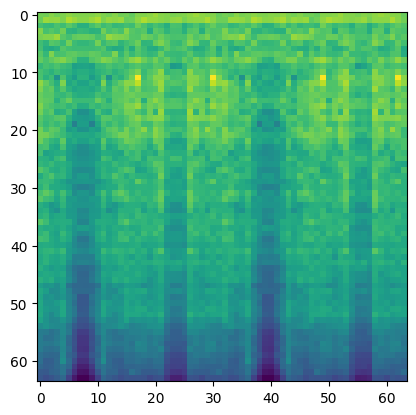

In [3]:
import matplotlib.pyplot as plt

plt.imshow(train_dataset[100][0][0].numpy())

In [4]:
if torch.cuda.is_available():
    device=torch.device('cuda:0')
else:
    device=torch.device('cpu')

print(f"Device: {device}")

Device: cuda:0


In [10]:
from model import VGG11

load_pretrained = True

if not load_pretrained:
    from train import train_vgg11
    train_vgg11()

vgg11 = VGG11().to(device)
vgg11.load_state_dict(torch.load(f="data/vgg.pth"))

   

<All keys matched successfully>

In [20]:
# confusion matrix
import numpy as np
from sklearn.metrics import confusion_matrix
from train import accuracy_fn

vgg11.eval()

y_pred = []
y_true = []

with torch.inference_mode():
    for X, y in test_loader:
        X, y = X.to(device), y.to(device)

        test_pred = vgg11(X)
        test_pred = test_pred.argmax(dim=1).data.cpu().numpy() # logits -> labels
        # print(test_pred)

        y_pred.extend(test_pred)

        labels = y.data.cpu().numpy()
        y_true.extend(labels)

print(f'Confusion Matrix: \n{confusion_matrix(y_pred, y_true)}')
print(f'Accuracy: {accuracy_fn(y_true=torch.from_numpy(np.array(y_true)), y_pred=torch.from_numpy(np.array(y_pred)))}')


/home/op/miniconda3/envs/torch/lib/python3.11/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/home/op/miniconda3/envs/torch/lib/python3.11/site-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning,

Confusion Matrix: 
[[174   1   0   0   0   5   0   0   0   0]
 [  0  94   0   0   0   0   0   0   0   0]
 [  0   0 158   0   0   0   0   0   0   0]
 [  0   0   1 180   0   0   0   0   0   0]
 [  0   2   2   1 181   0   1   2   0   0]
 [  0   0   0   1   0 192   0   0   0   0]
 [  1   0   5   0   1   0  71   0   0   1]
 [  0   0   0   0   0   1   0 211   0   0]
 [  0   0   0   0   0   0   0   0 266   1]
 [  1   0  14   0   1   2   0   1   0 175]]
Accuracy: 97.42415569547796
